<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

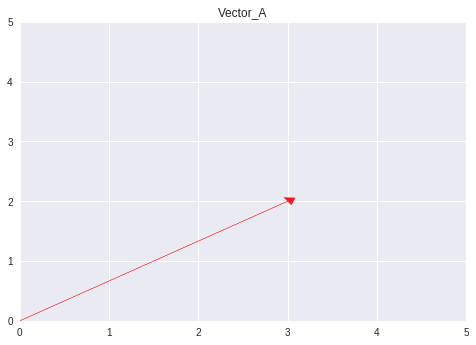

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

v_a = [3,2]


plt.arrow(0,0, v_a[0], v_a[1], head_width=.15,
          head_length=0.1, color = 'r', alpha = .9)

plt.title('Vector_A')
plt.axis([0, 5, 0, 5])
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
v_b = np.array([17,-4,-2,1])
v_b_norm = np.linalg.norm(v_b)
print('Vector b norm =',v_b_norm)

Vector b norm = 17.60681686165901


The norm of a vector represents the length of a vector with the following properties:

*   0 or positive value
*   Equal to 0 if all elements of the vector are 0
*   Triangle inequality



## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
v_c = [3,7,-2,12]
v_d = [9,-7,4,6]

v_cd = np.dot(v_c,v_d)
print('Vectors c_d dot product =',v_cd)

Vectors c_d dot product = 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [8]:
mE = np.matrix('7 4 2;1 3 -1;2 6 -4')
mEinv = np.linalg.inv(mE)
print('E_Inverse: \n',mEinv)


E_Inverse: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [5]:
print('E_transpose: \n', mE.T)

E_transpose: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [9]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [10]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [11]:
mean_customers = sum(customers) / len(customers)
var_customers = sum((xi - mean_customers) ** 2 for xi in customers) / (len(customers)-1)
std_customers = var_customers**.5
print('Mean Customers =',mean_customers)
print('Variance Customers =',var_customers)
print('SD Customers =',std_customers)

Mean Customers = 1135.7142857142858
Variance Customers = 98761.90476190478
SD Customers = 314.26406851866597


In [12]:
mean_snow = sum(snow) / len(snow)
var_snow = sum((xi - mean_snow) ** 2 for xi in snow) / (len(snow)-1)
std_snow = var_snow**.5
print('Mean Snow Fall =',mean_snow)
print('Variance Snow Fall =',var_snow)
print('SD Snow Fall =',std_snow)

Mean Snow Fall = 2.7142857142857144
Variance Snow Fall = 8.571428571428571
SD Snow Fall = 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No the variances of the number of customers and inches of snow is not directly comparable because of the unit of measure and magnitude are quite different. Without standardization, a cursory assessment of the variances may mislead an analysis to overweigh the spread of the customer data in comparison to snow fall data.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [15]:
np.set_printoptions(suppress=True)
cov = np.cov(customers,snow)
print(cov)

[[98761.9047619    670.23809524]
 [  670.23809524     8.57142857]]


In [16]:
# Check correlation coefficient
corrco = cov/(std_customers*std_snow)
print(corrco)

[[107.34161459   0.72846346]
 [  0.72846346   0.00931605]]


There appears to be some positive correlation to the number of customers when there is more snow fall at the ski resort. 

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [18]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [19]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


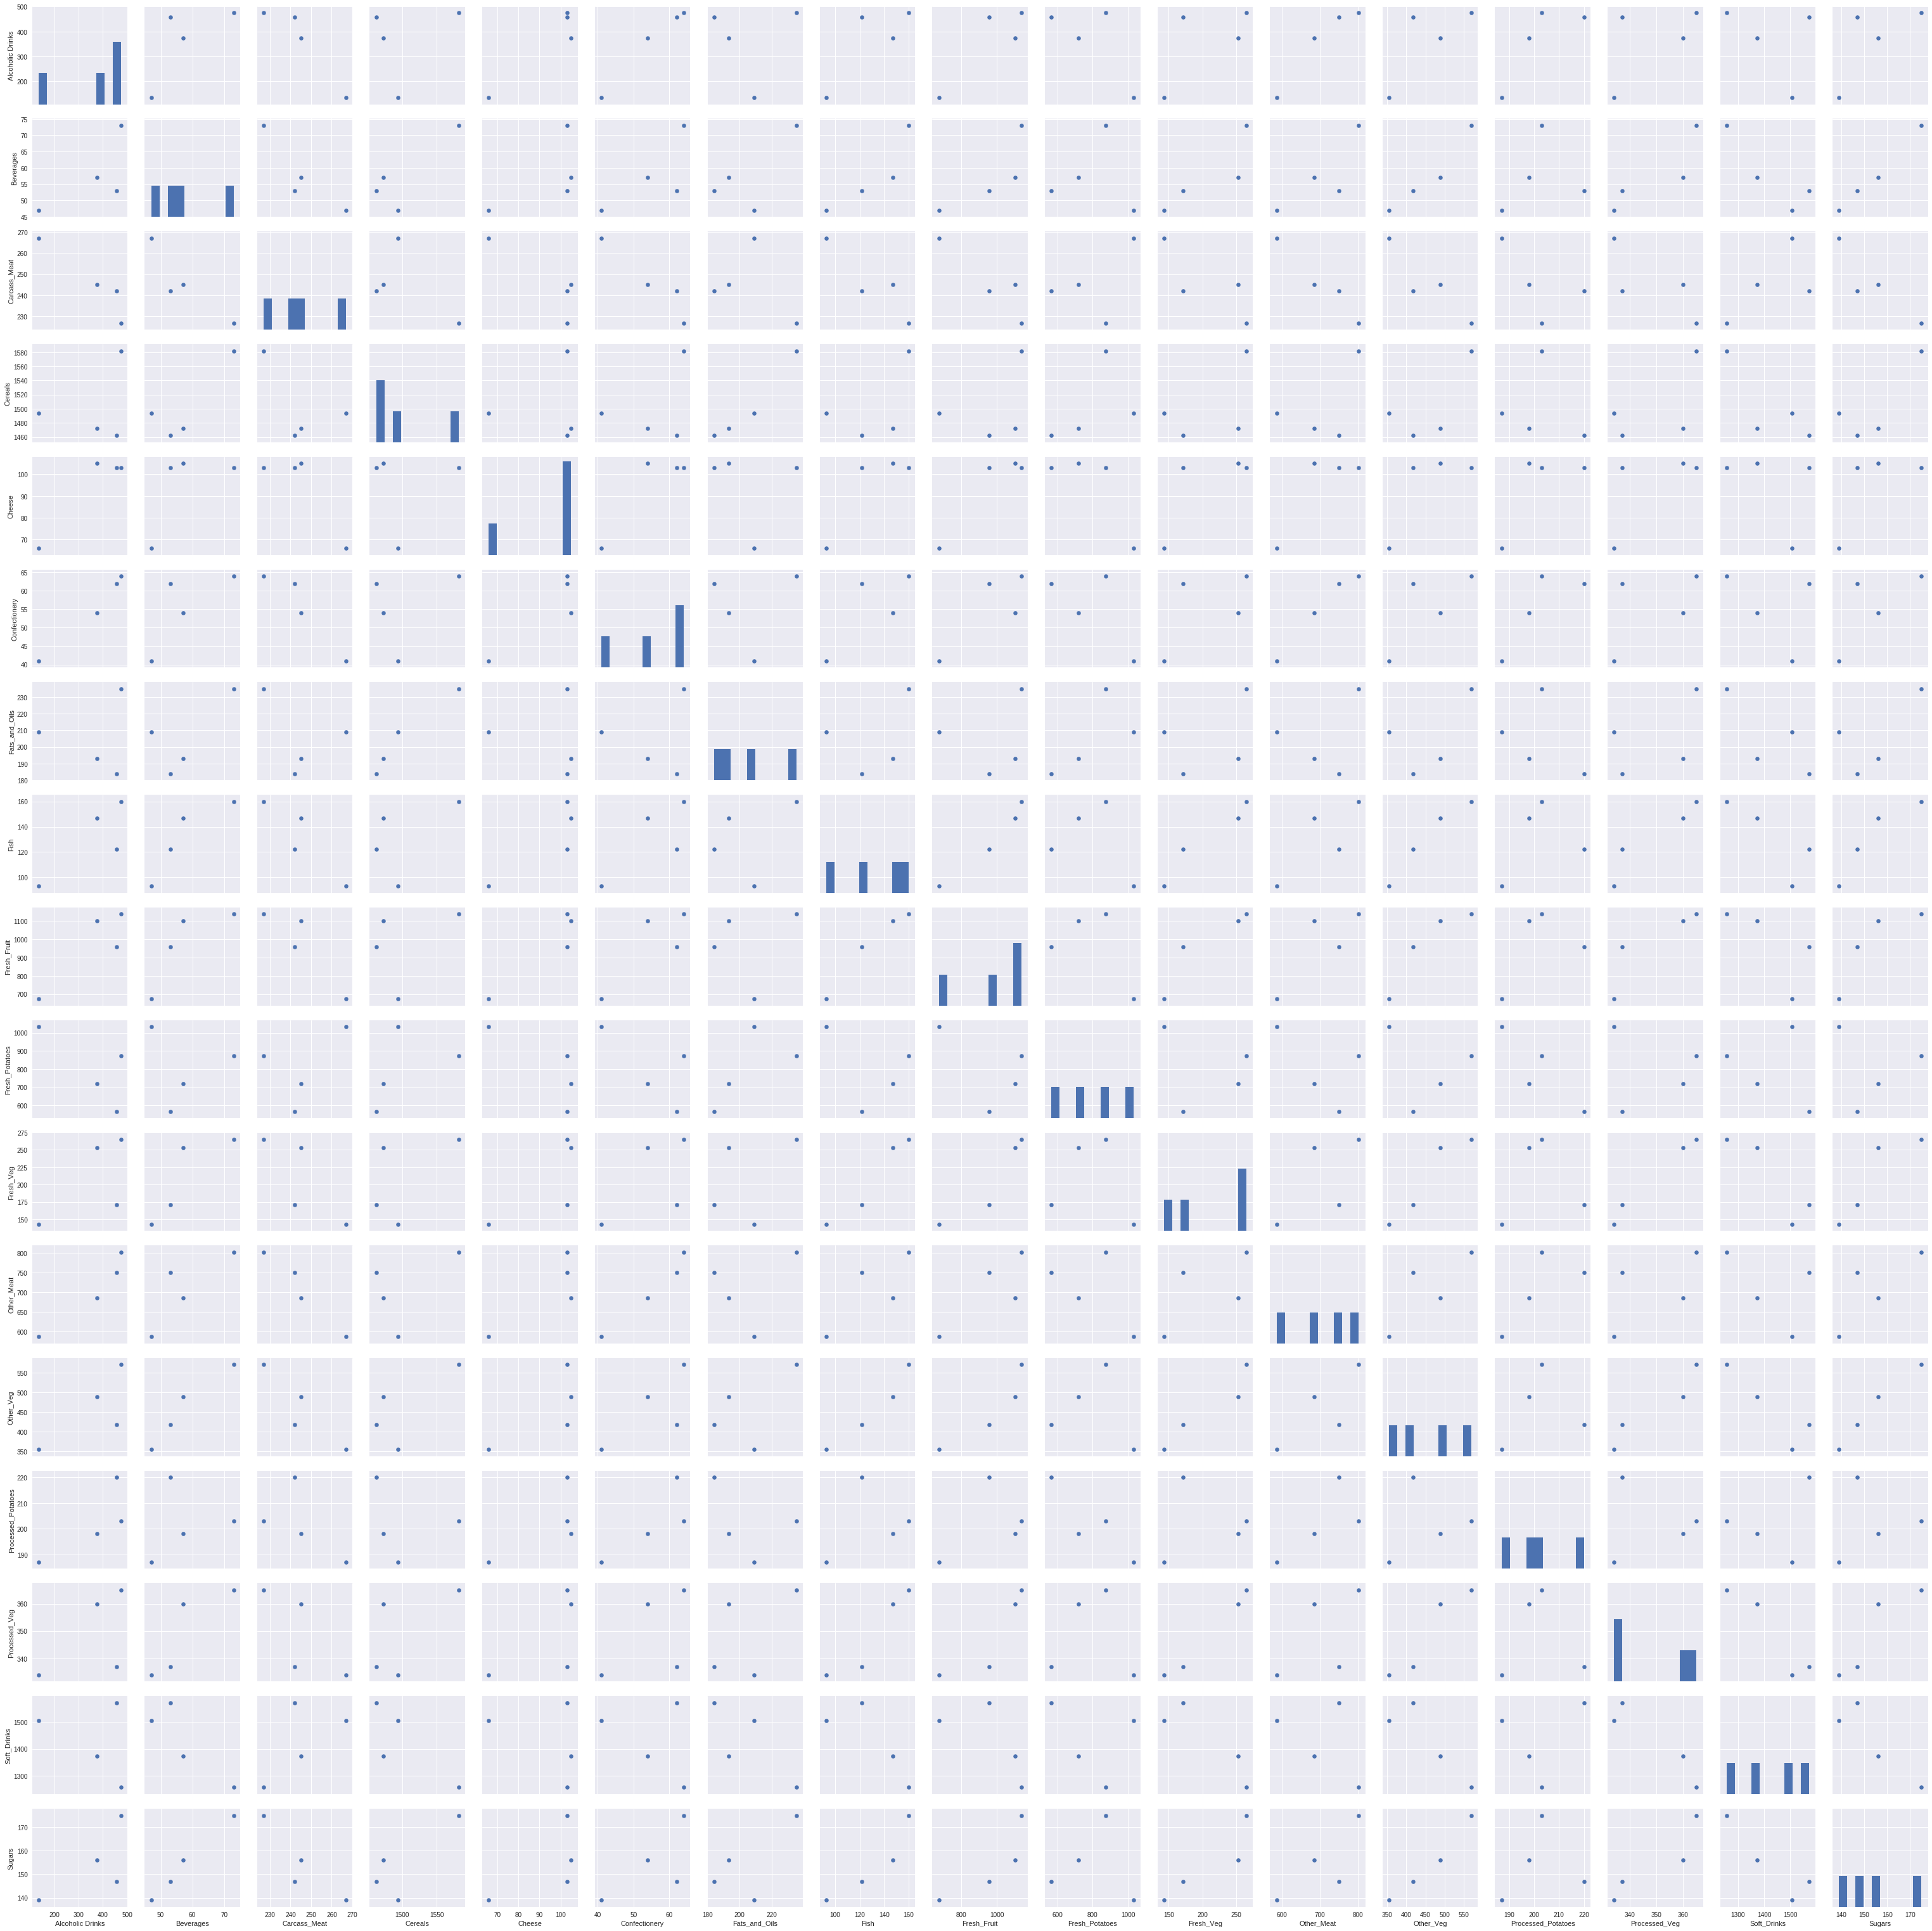

In [20]:
# Check pairplot for initial data exploration
import seaborn as sns
sns.pairplot(X)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
# Standardize the data 

names = X.columns

Xstandard = scaler.fit_transform(X)

Xstandard = pd.DataFrame(Xstandard, columns=names)

Xstandard.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


In [24]:
# Check for mean = 0 and std to be close to 1.0 and uniform across x variables

Xstandard.describe()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
count,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,0.000000,-5.551115e-17,0.000000,6.938894e-18,0.000000,5.551115e-17,6.938894e-18,0.000000,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,-5.551115e-17,-2.775558e-17,-5.551115e-17
std,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.663384,-1.090266e+00,-1.277169,-8.555755e-01,-1.729885,-1.576656e+00,-1.097071e+00,-1.464967,-1.609137,-1.335847,-1.247006e+00,-1.483121,-1.283054,-1.260994,-1.098378e+00,-1.404236e+00,-1.137656e+00
25%,-0.337098,-6.230090e-01,-0.489873,-6.971356e-01,-0.030617,-4.978915e-01,-7.485897e-01,-0.615286,-0.445460,-0.671519,-8.441271e-01,-0.565440,-0.693036,-0.567447,-9.336213e-01,-6.774824e-01,-6.900536e-01
50%,0.410780,-2.595871e-01,-0.122468,-4.119437e-01,0.535805,3.042670e-01,-2.194142e-01,0.156263,0.339920,-0.007190,7.673883e-02,0.142132,-0.059314,-0.126099,-3.661260e-02,1.067548e-01,-2.051511e-01
75%,0.747878,3.634219e-01,0.367405,2.851918e-01,0.566422,8.021585e-01,5.291754e-01,0.771549,0.785380,0.664329,9.208660e-01,0.707572,0.633722,0.441348,8.970087e-01,7.842372e-01,4.849025e-01
max,0.841823,1.609440e+00,1.522105,1.679463e+00,0.658275,9.681224e-01,1.535899e+00,1.152440,0.929297,1.350227,1.093528e+00,1.198856,1.401682,1.513193,1.171603e+00,1.190727e+00,1.547958e+00


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [26]:
# Apply PCA to reduce dimensions down to 2 principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xstandard)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

print(pd.DataFrame(pca.components_,columns=Xstandard.columns,index = ['PC-1','PC-2']))

      Alcoholic Drinks  Beverages  Carcass_Meat   Cereals    Cheese  \
PC-1         -0.255095  -0.277475      0.285629 -0.178440 -0.245721   
PC-2          0.232318  -0.137738     -0.077170 -0.329029  0.247080   

      Confectionery  Fats_and_Oils      Fish  Fresh_Fruit  Fresh_Potatoes  \
PC-1      -0.252758      -0.127195 -0.286118    -0.278905        0.097759   
PC-2       0.211057      -0.400545 -0.011006     0.081746       -0.454688   

      Fresh_Veg  Other_Meat  Other_Veg  Processed_Potatoes  Processed_Veg  \
PC-1  -0.265450   -0.264811  -0.287086           -0.120738      -0.257678   
PC-2  -0.096486    0.136107  -0.092823            0.410361      -0.153960   

      Soft_Drinks    Sugars  
PC-1      0.22772 -0.281101  
PC-2      0.29324 -0.136841  


In [30]:
principalDf

,principal component 1,principal component 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


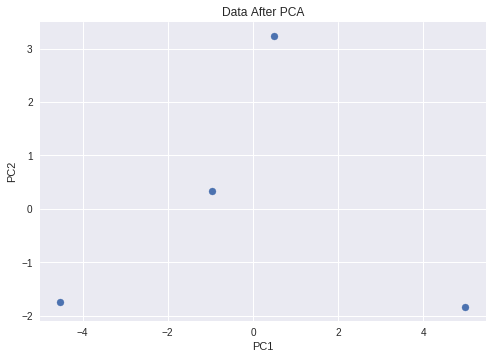

In [31]:
# Plot the data to see the visual distance of relationship between the 4 countries by 2 principal components

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [41]:
principalComponents

array([[-0.95448984,  0.32831832],
       [-4.52095094, -1.73537967],
       [ 0.48797835,  3.23367195],
       [ 4.98746242, -1.8266106 ]])

In [42]:
# Return Eigenvalues and check for % of variance explained by PCs

print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])



 Eigenvalues: 
 [15.48765084  5.63749203]

 % variance explained: 
 ['68.3%', '24.9%']


In [45]:
# Check for composition with 3 PC

pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(Xstandard)
print("\n Eigenvalues: \n", pca2.explained_variance_)
print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca2.explained_variance_ratio_])


 Eigenvalues: 
 [15.48765084  5.63749203  1.5415238 ]

 % variance explained: 
 ['68.3%', '24.9%', '6.8%']


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [32]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [33]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

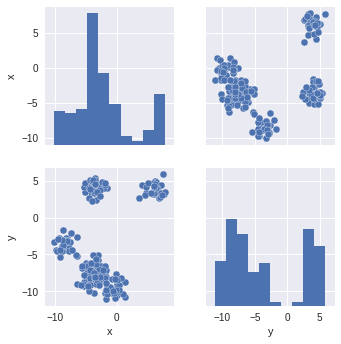

In [35]:
# Orientation of data with pairplot

sns.pairplot(points)

Looks like 4 or 5 clusters

In [0]:
# Check out 5 clusters based on pairplot 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
points_kmeans = kmeans.predict(points)

In [54]:
# Make new dataframe with cluster column
points2 = points[['x','y']].copy()
points2['cluster'] = points_kmeans
points2

,x,y,cluster
0,-7.846803,-3.421277,4
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,3
3,-6.401456,-5.223972,4
4,-0.804026,-9.704457,3
5,-4.977194,-6.138836,0
6,-8.118990,-3.624109,4
7,-8.145629,-2.787951,4
8,-3.568659,5.401781,2
9,-5.711709,-6.802013,0


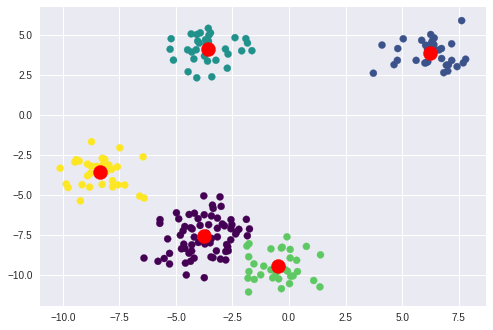

In [40]:
plt.scatter(points['x'], points['y'], c=points_kmeans, s=50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);

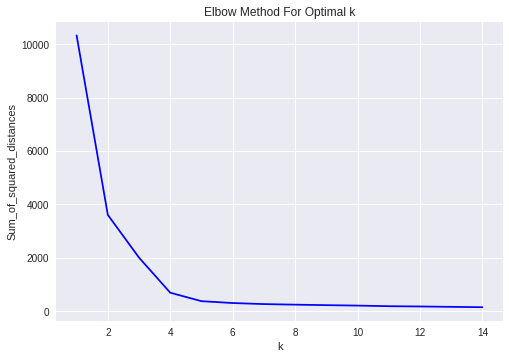

In [46]:
# Check elbow method for insight into K selection

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

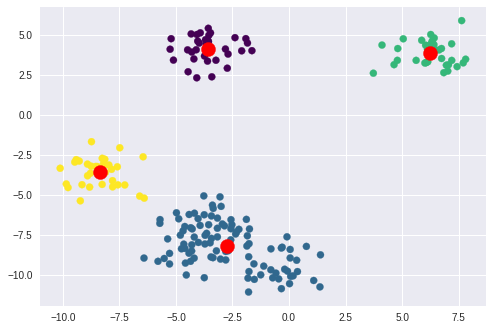

In [52]:
# Run 4 clusters as alternative based on elbow method

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
points_kmeans4 = kmeans4.predict(points)

plt.scatter(points['x'], points['y'], c=points_kmeans4, s=50, cmap = 'viridis')

centers = kmeans4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);